<a href="https://colab.research.google.com/github/LeonardoGoncRibeiro/06_MachineLearning/blob/main/02_Advanced/01_DeepLearning_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Deep Learning with Keras

In this course, we will start to understand what is Deep Learning and why this is a very popular topic of study. For this end, we will use Keras and Tensorflow, which are very popular Python libraries for building Artificial Neural Networks (ANNs) and Deep Neural Networks (DNNs). 

In this course, we will use the following packages:

In [78]:
import tensorflow
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np

## Dataset

In this course, we will work with some very popular datasets, and we will start delving into image recognition. Let's start by importing our dataset:

In [37]:
dataset = keras.datasets.fashion_mnist

((X_train, y_train), (X_test, y_test)) = dataset.load_data( )

In this dataset, we have 60000 images in the training set, and 10000 in the test set:

In [38]:
len(X_train)

60000

In [39]:
len(X_test)

10000

And how is this data structured? Let's get the shape of our training set:

In [40]:
X_train.shape

(60000, 28, 28)

So, this is telling us that we have 60000 images (as we have already identified), and each of our images are defined by a $28 \times 28$ matrix. Let's see one of those matrices:

In [41]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

So, actually, we have a numeric matrix. To see the image from our dataset, we can do:

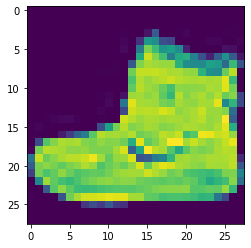

In [42]:
plt.imshow(X_train[0])

Nice! Finally, we are able to see our first image, which looks like a boot. Also, we have 28 pixels in each axis. Let's see the target label for this image:

In [43]:
y_train[0]

9

Note that, actually, we have a number as our target. Most likely, there is relation between this number and the label for the target. In fact, if we search a little on the internet, we can find that this relation is:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot

Thus, our first image as an Ankle boot! Let's test one more image:

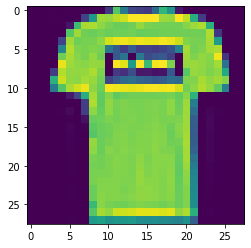

In [44]:
plt.imshow(X_train[1])

This looks like a T-shirt, which has a target label 0. If we check:

In [45]:
y_train[1]

0

Indeed, we have the correct target label!

Before jumping to the next topic, let's create a dictionary to map the target labels to their respective meaning:

In [46]:
target_map = {0 : 'T-shirt/top', 1 : 'Trouser', 2 : 'Pullouver', 3 : 'Dress', 4 : 'Coat', 
              5 : 'Sandal', 6 : 'Shirt', 7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle boot'}

Now, let's try to plot the first 10 images from our dataset, using their classification as the title:

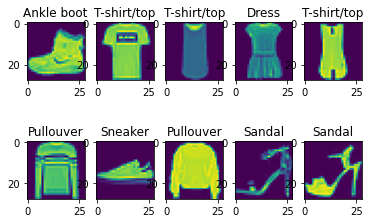

In [47]:
for image in range(10):
  plt.subplot(2, 5, image + 1)
  plt.imshow(X_train[image])
  plt.title(target_map[y_train[image]])

Nice! It seems that everything is correct.

# Starting to build our Neural Network

Finally, let's start to build our Neural Network. 

A Neural Network is usually made of multiple layers, each having multiple neurons. 

The first layer will receive the input of our model. The intermediate labels are the hidden labels, and store the processing of our model. Finally, in the final label, we have the output of our model. This simple Neural Network is denominated as Sequential.

This way, the first label needs to receive the inputs of our model. Note that our images are represented by $28 \times 28$ matrices. Thus, our input layer should be able to receive each pixel from our image, and pass those to the following layers. Since we have a $28 \times 28$ matrix, we have 784 pixels in our figure. Thus, our input layer should have 784 neurons.

In [48]:
input_layer = keras.layers.Flatten(input_shape = (28, 28))

Note that, here, we used the ```Flatten( )``` method to get the neurons from the first layer (transformed from a matrix to a vector). 

## Creating our first hidden layer

So, we have created our first hidden layer, which should have a fixed number of neurons, which depends on the input dimension. 

Next, we can start creating the hidden layers. We can use as many hidden layers as we want, and each hidden layer can have as many neurons as we want. The more layers and the more neurons we create, the more "freedom" we are giving to our model, and the more likely it is that the model will overfit to our training dataset. 

There are different types of hidden layers. Here, we will create a Dense layer, where all neurons from the previous layer are connected to all neurons on the current layer. 

The hidden layer applies a transformation to the values received from the previous layers. This transformation depends on the activation function used. The most popular activation function is the Relu funcion, which will be used here. More on this activation function can be found in:

https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

Finally, to create our dense layer, we may simply do:

In [49]:
hidden_layer_1 = keras.layers.Dense(256, activation = tensorflow.nn.relu)

## Creating our output layer

Ok, we created ou input layer and our hidden layer. Finally, let's create our output layer. Once again, the output layer may be a layer where all neurons are connected to all neurons from the previous layer. Thus, we want to create a Dense layer. 

However, since we have 10 possible outputs (the 10 possible target labels), our output layer has a fixed size: 10. Also, we should use specific activation functions that allow us to find those target labels. It should be a function which evaluates probabilities: each neuron will have a number between 0 and 1, and their sum is 1. Each number may be understood as the probability that the image corresponds to a given target label. Thus, whichever target label has the highest probability is used to classify the image.

To this end, we will use the Softmax function. More on the softmax function can be found in:

https://deepai.org/machine-learning-glossary-and-terms/softmax-layer

In [50]:
output_layer = keras.layers.Dense(10, activation = tensorflow.nn.softmax)

# Linking our layers and creating our first model

So, we have created our layers separately. Now, let's join our layers together, and create a model. We may define a Sequential model using:

In [51]:
model = keras.Sequential([
                          input_layer,
                          hidden_layer_1,
                          output_layer
])

# Compiling and fitting our model

Different from usual models implemented in SKLearn, we need to compile our model before trying to fit it to the data. 

When we fit our Neural Network, we essentially are finding the optimal activation function parameters to perform our prediction. All parameters start at a random value, and the optimizer will be able to slowly adjust these parameters until the optimal values are found. 

Thus, when compiling our model, we have to define which will be the optimizer for our model, and which loss function will be used. This loss function is used to evaluate the goodness of fit of each set of parameters. Here, we will use the Adam optimizer, and we will use the cross entropy as the loss function.

We can compile our model using:

In [52]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')

To fit our model, we do:

In [53]:
model.fit(X_train, y_train)

1875/1875 [==============================] - 6s 3ms/step - loss: 4.0815


Nice! We have fitted our model using 1 epoch. Here, we got a loss of 4.1198. The lower our loss, the better our model is. Now, let's do some transformations that allow us to improve our model performance. Our data stores information about each of our figures, and each pixel has a number between 1 and 255 (RGB). The first thing we can do is normalize our data, so that our entire design space is between 0 and 1.

In [54]:
X_train = X_train/255.0
X_test  = X_test/255.0

Now, let's fit our model once again:

In [55]:
model.fit(X_train, y_train)

1875/1875 [==============================] - 7s 3ms/step - loss: 1.0317


Nice! Our loss reduced! Another thing we can do is add new hidden layers. For instance, we can use:

In [61]:
input_layer    = keras.layers.Flatten(input_shape = (28, 28))
hidden_layer_1 = keras.layers.Dense(256, activation = tensorflow.nn.relu)
hidden_layer_2 = keras.layers.Dense(128, activation = tensorflow.nn.relu)
output_layer   = keras.layers.Dense(10,  activation = tensorflow.nn.softmax)

Now, let's define our model once again, and compile it:

In [ ]:
del model

In [62]:
model = keras.Sequential([
                          input_layer,
                          hidden_layer_1,
                          hidden_layer_2,
                          output_layer
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')

Finally, we can fit our model using:

In [63]:
model.fit(X_train, y_train)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.4750


Nice! Again, we were able to reduce our loss! It seems that, by adding new hidden layers, we are improving our model. Let's add a new hidden layer:

In [64]:
input_layer    = keras.layers.Flatten(input_shape = (28, 28))
hidden_layer_1 = keras.layers.Dense(256, activation = tensorflow.nn.relu)
hidden_layer_2 = keras.layers.Dense(128, activation = tensorflow.nn.relu)
hidden_layer_3 = keras.layers.Dense(64,  activation = tensorflow.nn.relu)
output_layer   = keras.layers.Dense(10,  activation = tensorflow.nn.softmax)

del model

model = keras.Sequential([
                          input_layer,
                          hidden_layer_1,
                          hidden_layer_2,
                          hidden_layer_3,
                          output_layer
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')

model.fit(X_train, y_train)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.4831


This time, our loss actually increased a little. It seems that our model is becoming too complex, and our optimizer is not being able to fit our model correctly. Thus, let's return to our previous model:

In [65]:
input_layer    = keras.layers.Flatten(input_shape = (28, 28))
hidden_layer_1 = keras.layers.Dense(256, activation = tensorflow.nn.relu)
hidden_layer_2 = keras.layers.Dense(128, activation = tensorflow.nn.relu)
output_layer   = keras.layers.Dense(10,  activation = tensorflow.nn.softmax)

del model

model = keras.Sequential([
                          input_layer,
                          hidden_layer_1,
                          hidden_layer_2,
                          output_layer
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')

model.fit(X_train, y_train)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.4802


Note that, currently, we are only using 1 epoch. That means that Neural Network is trying to be fitted only once. However, we can increase the number of epochs to get an even lower loss function. We can do that using:

In [66]:
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3606
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3220
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3014
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2841
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2707


Note that, at each epoch, we are decreasing our loss. However, the more epochs we use, the lower the effect of the next epoch. This means that the effect of new epochs is not increasing very much. 

Also, it is hard to understand what "loss" represents. It would be better if we could print the model accuracy for each epoch. We can do that by:

In [67]:
input_layer    = keras.layers.Flatten(input_shape = (28, 28))
hidden_layer_1 = keras.layers.Dense(256, activation = tensorflow.nn.relu)
hidden_layer_2 = keras.layers.Dense(128, activation = tensorflow.nn.relu)
output_layer   = keras.layers.Dense(10,  activation = tensorflow.nn.softmax)

del model

model = keras.Sequential([
                          input_layer,
                          hidden_layer_1,
                          hidden_layer_2,
                          output_layer
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4749 - accuracy: 0.8289
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3565 - accuracy: 0.8687
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3216 - accuracy: 0.8821
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2986 - accuracy: 0.8894
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2802 - accuracy: 0.8951


Nice! Note that our accuracy increases from 82.9%, on the first epoch, to 89.51%, on the final epoch. 

# Testing our Neural Network

So, we have fitted our Neural Network to the training set, evaluating the accuracy of our model on this training set. Now, let's see how our model behaves to new data, that is, let's evaluate the accuracy over the test set. 

To get the prediction for one image, we can do:

In [73]:
y_pred = model.predict(X_test)

In [74]:
y_pred[0]

array([3.4807530e-05, 3.9625202e-06, 2.0246873e-06, 3.1841262e-06,
       9.6405702e-06, 1.2096282e-03, 1.9573057e-05, 3.7266392e-02,
       5.6662506e-05, 9.6139413e-01], dtype=float32)

So, here, we have an array with ten positions, each having a float. Note that the sum of those values is 1:

In [75]:
y_pred[0].sum( )

1.0

This number is the probability that the image is labelled as each of the target classes. To get the prediction, we can use:

In [80]:
highest_proba_id = np.argmax(y_pred[0])
highest_proba_id

9

Finally, to get the label, we can use:

In [81]:
target_map[highest_proba_id]


'Ankle boot'

So, our model expects that the first image is an ankle boot. Let's check:

In [82]:
y_test[0]

9

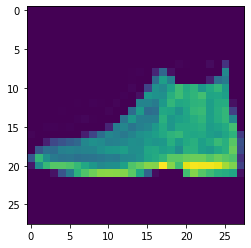

In [83]:
plt.imshow(X_test[0])

Nice! Indeed, our first image is an ankle boot!

Finally, to get the accuracy over our test set we can use:

In [85]:
loss_test, acc_test = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3359 - accuracy: 0.8752


So, the accuracy over the test set is 87.5%!

# Using a validation set

Note that, here, we used a train and a test set. However, we may want to use a validation set, to check the accuracy of the trained model during model fitting. To do that, we can define a parameter on model fitting:

In [95]:
input_layer    = keras.layers.Flatten(input_shape = (28, 28))
hidden_layer_1 = keras.layers.Dense(256, activation = tensorflow.nn.relu)
hidden_layer_2 = keras.layers.Dense(128, activation = tensorflow.nn.relu)
output_layer   = keras.layers.Dense(10,  activation = tensorflow.nn.softmax)

del model

model = keras.Sequential([
                          input_layer,
                          hidden_layer_1,
                          hidden_layer_2,
                          output_layer
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

fit_history = model.fit(X_train, y_train, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 9s 5ms/step - loss: 0.4950 - accuracy: 0.8227 - val_loss: 0.3855 - val_accuracy: 0.8597
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3686 - accuracy: 0.8649 - val_loss: 0.3562 - val_accuracy: 0.8715
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3317 - accuracy: 0.8769 - val_loss: 0.3702 - val_accuracy: 0.8677
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3051 - accuracy: 0.8870 - val_loss: 0.3333 - val_accuracy: 0.8837
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2878 - accuracy: 0.8923 - val_loss: 0.3246 - val_accuracy: 0.8831


Now, we show the validation accuracy over the epochs. This is interesting if we want to optimize our model hyper-parameters, and we can use the validation accuracy to see which model hyperparameters show the highest accuracy outside the training set. Then, the test set can be used at the end, to prevent data leakage.

Also, the validation accuracy helps us to check if our model is getting over fitted to the data. Note that the training set accuracy always increases as we move to new epochs. However, the validation accuracy decreases at some points. That occurs because is data is becoming overfitted to the training set, and generalization of our model is not as good.

To make this more clear, we can also plot the accuracy over the epochs:

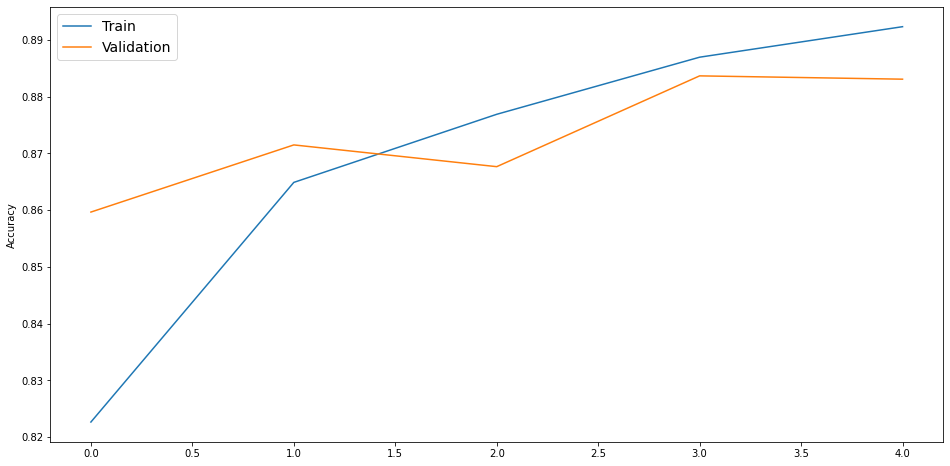

In [99]:
plt.figure(figsize = (16, 8))

plt.plot(fit_history.history['accuracy'], label = 'Train')
plt.plot(fit_history.history['val_accuracy'], label = 'Validation')

plt.ylabel('Accuracy')
plt.legend(fontsize = 14)

It seems that our train/validation accuracy may still increase. Thus, we could try to increase the number of epochs to see if we are able to increase our model accuracy even further. Let's try to use 20 epochs:

In [100]:
input_layer    = keras.layers.Flatten(input_shape = (28, 28))
hidden_layer_1 = keras.layers.Dense(256, activation = tensorflow.nn.relu)
hidden_layer_2 = keras.layers.Dense(128, activation = tensorflow.nn.relu)
output_layer   = keras.layers.Dense(10,  activation = tensorflow.nn.softmax)

del model

model = keras.Sequential([
                          input_layer,
                          hidden_layer_1,
                          hidden_layer_2,
                          output_layer
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

fit_history = model.fit(X_train, y_train, epochs = 20, validation_split = 0.2)

Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4942 - accuracy: 0.8209 - val_loss: 0.4153 - val_accuracy: 0.8509
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3705 - accuracy: 0.8640 - val_loss: 0.3577 - val_accuracy: 0.8673
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3344 - accuracy: 0.8763 - val_loss: 0.3597 - val_accuracy: 0.8708
Epoch 4/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3062 - accuracy: 0.8864 - val_loss: 0.3496 - val_accuracy: 0.8739
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2894 - accuracy: 0.8926 - val_loss: 0.3442 - val_accuracy: 0.8773
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2743 - accuracy: 0.8974 - val_loss: 0.3228 - val_accuracy: 0.8874
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2591 - accuracy: 0.9032 - val_loss: 0.3322 - val_accuracy:

Now, let's plot our accuracy over the epochs:

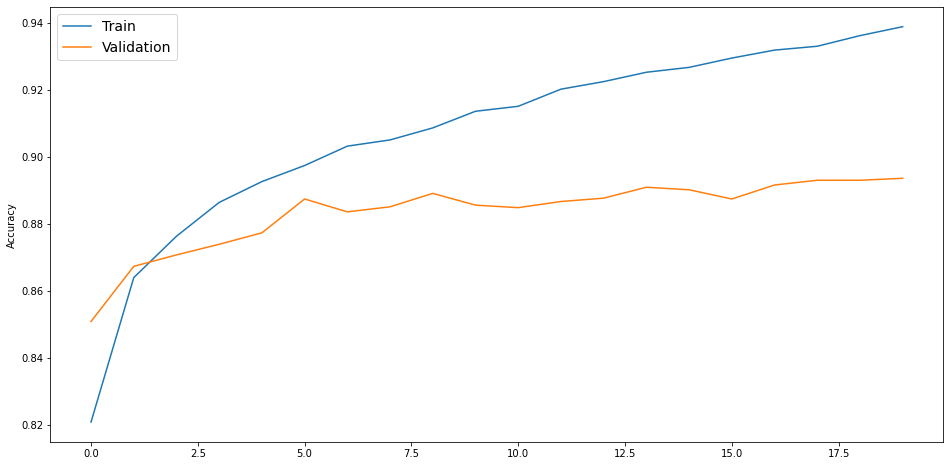

In [101]:
plt.figure(figsize = (16, 8))

plt.plot(fit_history.history['accuracy'], label = 'Train')
plt.plot(fit_history.history['val_accuracy'], label = 'Validation')

plt.ylabel('Accuracy')
plt.legend(fontsize = 14)

Note that the train accuracy continues tho increase, but the validation accuracy seems to have stabilized (even though it still did not start to decrease). This likely means that our model is over-fitted to the data. If we now check the accuracy of the test set:

In [102]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3861 - accuracy: 0.8871


[0.38610562682151794, 0.8870999813079834]

We get an accuracy of 88.71%, which is much closer to the final validation accuracy than the final training accuracy.

Finally, here, we will end up using 8 epochs, since, after that, it seems that our validation accuracy stabilized:

In [103]:
input_layer    = keras.layers.Flatten(input_shape = (28, 28))
hidden_layer_1 = keras.layers.Dense(256, activation = tensorflow.nn.relu)
hidden_layer_2 = keras.layers.Dense(128, activation = tensorflow.nn.relu)
output_layer   = keras.layers.Dense(10,  activation = tensorflow.nn.softmax)

del model

model = keras.Sequential([
                          input_layer,
                          hidden_layer_1,
                          hidden_layer_2,
                          output_layer
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

fit_history = model.fit(X_train, y_train, epochs = 8, validation_split = 0.2)

Epoch 1/8
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4945 - accuracy: 0.8219 - val_loss: 0.4296 - val_accuracy: 0.8426
Epoch 2/8
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3694 - accuracy: 0.8636 - val_loss: 0.3742 - val_accuracy: 0.8651
Epoch 3/8
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3298 - accuracy: 0.8767 - val_loss: 0.3620 - val_accuracy: 0.8700
Epoch 4/8
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3030 - accuracy: 0.8873 - val_loss: 0.3355 - val_accuracy: 0.8797
Epoch 5/8
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2866 - accuracy: 0.8929 - val_loss: 0.3146 - val_accuracy: 0.8889
Epoch 6/8
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2708 - accuracy: 0.8982 - val_loss: 0.3435 - val_accuracy: 0.8808
Epoch 7/8
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2604 - accuracy: 0.9024 - val_loss: 0.3448 - val_accuracy: 0.8807

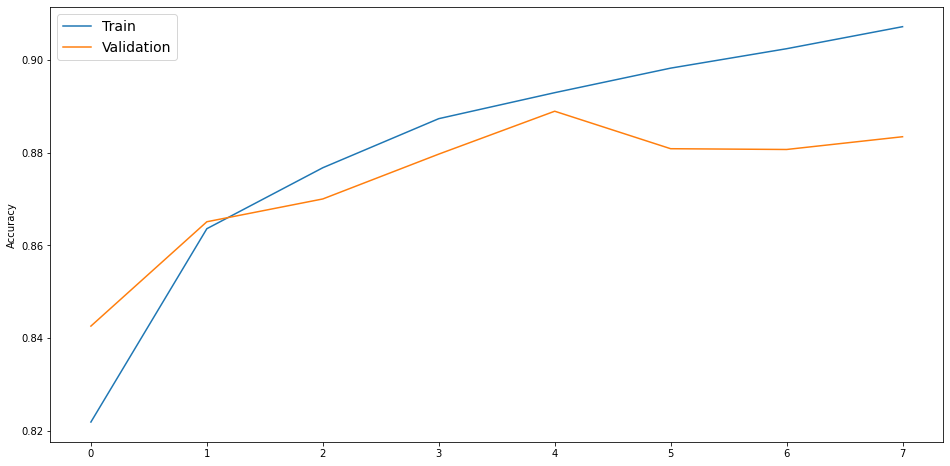

In [107]:
plt.figure(figsize = (16, 8))

plt.plot(fit_history.history['accuracy'], label = 'Train')
plt.plot(fit_history.history['val_accuracy'], label = 'Validation')

plt.ylabel('Accuracy')
plt.legend(fontsize = 14)

Still, our validation accuracy is much lower than the training accuracy. How can we improve this behavior?

# Using a dropout layer

Another thing we can do to prevent overfitting is using a dropout layer. This layer we slow down the model fitting, making model fitting smoother. To use a dropout layer, we can use:

In [113]:
input_layer    = keras.layers.Flatten(input_shape = (28, 28))
hidden_layer_1 = keras.layers.Dense(256, activation = tensorflow.nn.relu)
hidden_layer_2 = keras.layers.Dense(128, activation = tensorflow.nn.relu)
dropout_layer  = keras.layers.Dropout(0.2)
output_layer   = keras.layers.Dense(10,  activation = tensorflow.nn.softmax)

del model

model = keras.Sequential([
                          input_layer,
                          hidden_layer_1,
                          dropout_layer,
                          hidden_layer_2,
                          dropout_layer,
                          output_layer
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

fit_history = model.fit(X_train, y_train, epochs = 20, validation_split = 0.2)

Epoch 1/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5587 - accuracy: 0.8007 - val_loss: 0.4166 - val_accuracy: 0.8482
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4135 - accuracy: 0.8487 - val_loss: 0.4017 - val_accuracy: 0.8571
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3796 - accuracy: 0.8608 - val_loss: 0.3563 - val_accuracy: 0.8715
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3579 - accuracy: 0.8683 - val_loss: 0.3563 - val_accuracy: 0.8643
Epoch 5/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3400 - accuracy: 0.8739 - val_loss: 0.3369 - val_accuracy: 0.8777
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3267 - accuracy: 0.8777 - val_loss: 0.3486 - val_accuracy: 0.8723
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3160 - accuracy: 0.8823 - val_loss: 0.3286 - val_accuracy:

What the dropout layer will do is effectively deactivate 20% (hence the 0.2 parameter) of the layers during each fitting phase, so that model fitting is slowed down. Thus, this makes the whole model fitting and optimization smoother. Here, we are using two dropout layers: one after each dense layer.

Let's plot our graph:

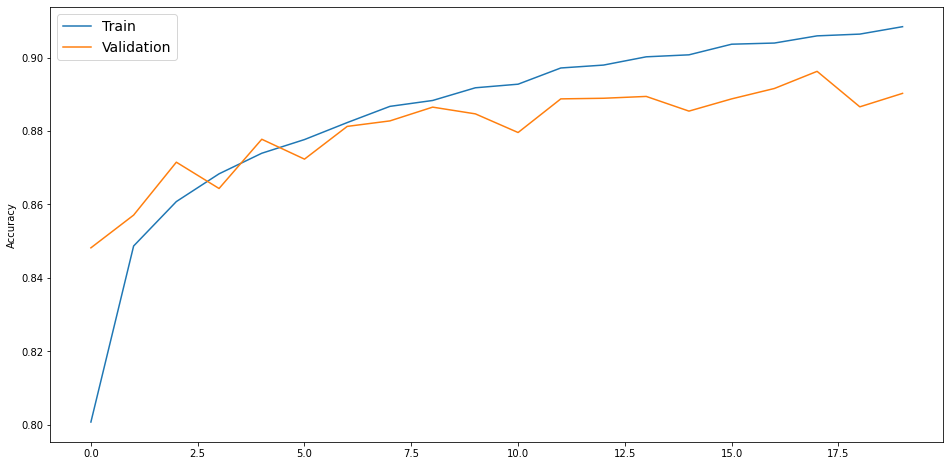

In [114]:
plt.figure(figsize = (16, 8))

plt.plot(fit_history.history['accuracy'], label = 'Train')
plt.plot(fit_history.history['val_accuracy'], label = 'Validation')

plt.ylabel('Accuracy')
plt.legend(fontsize = 14)

Nice! This time, our validation accuracy is much closer to the train accuracy. Here, we could use 8~10 epochs, since the validation accuracy seems to have stabilized after that.

# Saving our model

After we fit our model, we can save it using:

In [115]:
model.save('model.h5')

This creates a file 'model.h5' with information about our serialized model. To load our model, we can use:

In [116]:
saved_model = keras.models.load_model('model.h5')

Let's check if these models are, indeed, the same:

In [117]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3552 - accuracy: 0.8855


[0.3552040755748749, 0.8855000138282776]

In [118]:
saved_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3552 - accuracy: 0.8855


[0.3552040755748749, 0.8855000138282776]

Nice! WE got exactly the same accuracy and the same loss in both models.